# Projeto 3 - Speed Dating
---
    GRUPO:
      Beatriz Rianho Bernardino
      Igor Figueiredo
      Júlia Ribeiro Martins
      Vitor I. Bueno Bandeira
      
---

## DESCRIÇÃO:
---

O projeto, proposto pela matéria de Ciência dos dados da universidade Insper, tem como objetivo, conduzir uma análise de dados com alto grau de autonomia. Para isso, por meio de um arquivo de dados denominado "SpeedDating", disponivél na plataforma: https://www.openml.org/d/40536, criaremos um analisador de sentimento (classificador), utilizando uma técnica chamada RandomForest, capaz de prever se, por meio de características em comum, duas pessoas solteiras dão "Match" entre si, ou seja, se combinam ou não.

Dessa forma, nossa pergunta seria: **É possível descobrir se duas pessoas que ja se conheciam, ou não, vão dar match a partir de respostas típicas de um questionário de SpeedDating?**

O primeiro passo foi procurar um dataset ideal para trabalharmos, ou seja,  um dataset que contenha dados o suficiente para chegar em uma conclusão. Sendo assim, o dataset trabalhado ao longo do projeto se encontra no site exposto acima, e apresenta como variáveis:
* **gender**: Gênero da própria pessoa;
* **age**: Idade da própria pessoa;
* **age_o**: Idade do parceiro;
* **d_age**: Diferença de idade entre eles;
* **race**: Própria raça; 
* **race_o**: Raça do parceiro;  
* **importance_same_race**: Quão importante é seu parceiro ter a mesma raça que você? (0 a 10);  
* **importance_same_religion**: Quão importante é seu parceiro ter a mesma religião que você? (0 a 10); 
* **field**: Area de estudo;
* **pref_o_attractive**: Quão importante o parceiro classifica a atratividade? (0 a 100); 
* **pref_o_sinsere**: Quão importante o parceiro classifica a sinceridade? (0 a 100);
* **pref_o_intelligence**: Quão importante o parceiro classifica a inteligencia? (0 a 100); 
* **pref_o_funny**: Quão importante o parceiro classifica ser engraçado? (0 a 100);
* **pref_o_ambitious**: Quão importante o parceiro classifica a ambição? (0 a 100);  
* **pref_o_shared_interests**: Quão importante o parceiro classifica compartilhar os mesmos interesses? (0 a 100);  
* **attractive_o**: Avaliação do parceiro sobre a pessoa quanto a atratividade. (0 a 10); 
* **sincere_o**: Avaliação do parceiro sobre a pessoa quanto a sinceridade. (0 a 10);
* **intelligence_o**: Avaliação do parceiro sobre a pessoa quanto a inteligência. (0 a 10);  
* **funny_o**: Avaliação do parceiro sobre a pessoa quanto o senso de humor. (0 a 10);
* **ambitous_o**: Avaliação do parceiro sobre a pessoa quanto a ambição. (0 a 10);  
* **shared_interests_o**:Avaliação do parceiro sobre a pessoa quanto a comunicatividade. (0 a 10);  
* **attractive_important**: Quão importante para você é a atratividade? (0 a 100);
* **sincere_important**: Quão importante para você é a sinceridade? (0 a 100); 
* **intellicence_important**: Quão importante para você é a inteligência? (0 a 100);
* **funny_important**: Quão importante para você é o senso de humor? (0 a 100);  
* **ambtition_important**: Quão importante para você é a ambição? (0 a 100);  
* **shared_interests_important**: Quão importante para você é a comunicatividade? (0 a 100);   
* **attractive**: Quão ambicioso você é? (0 a 10);  
* **sincere**: Quão sincero você é? (0 a 10); 
* **intelligence**: Quão inteligente você é? (0 a 10);
* **funny**: Quão engraçado você é? (0 a 10);
* **ambition**: Quão ambicioso você é? (0 a 10);  
* **attractive_partner**:  Quão atrativo você achou o parceiro? (0 a 10); 
* **sincere_partner**: Quão sincero você achou o parceiro? (0 a 10); 
* **intelligence_partner**: Quão inteligente você achou o parceiro? (0 a 10); 
* **funny_partner**: Quão engraçado você achou o parceiro? (0 a 10);
* **ambition_partner**: Quão ambicioso você achou o parceiro? (0 a 10);
* **shared_interests_partner**: Quão comunicativo você achou o parceiro? (0 a 10);    
* **exercise**: Seu interesse sobre exercicios (1 a 10); 
* **art**: Seu interesse sobre arte (1 a 10);
* **clubbing**: Seu interesse sobre festas (1 a 10);
* **movies**: Seu interesse sobre filmes (1 a 10);
* **shopping**:  Seu interesse sobre ir as compras (1 a 10); 
* **interests_correlate**: Avaliação sobre a sua classificação e sobre a classificação do seu parceiro quanto a questão de compartilhar interesses;  
* **like**: Gostou do seu parceiro? (1:SIM ; 0:NÃO);
* **met**: Já conhecia seu parceiro antes? (1:SIM ; 0:NÃO);
* **match**: Deu match ou não? (1:SIM ; 0:NÃO).

In [139]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [140]:
# Adcionando o dataset a ser analizado
data_suja_completa=pd.read_csv("speeddating.csv")

# Lendo apenas as 5 primeiras linhas do dataset
data_suja_completa.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


---
# Análise Exploratória 
---

 Nosso objetivo é classificar, a partir dos dados já existentes no Dataset, se um casal vai dar "Match" ou não, para isso, como o dataset foi baseado em um evento com varias rodadas, a coluna "wave"  foi retirada, por mostrar a rodada que o casal estava, ou seja, ser insignificante para nossa amostra. Além disso, foram retiradas também, colunas que se referiam a expectativas sobre a noite do evento. Outros dados tambêm retirados se refere a coluna referente a raça do casal, responsável por dizer se abmos eram ou não da mesma raça, já que o dataset ja tinha a raça de cada um, tornando a coluna irrelevante. 

In [141]:
# Retirando culanas irrelavantes, para análise, do DataSet
data_suja_limpo=data_suja_completa[data_suja_completa!= "?" ] #Retirando interrogações do DataSet
data_suja_limpo.dropna(inplace=True)                          #Retirando dados definidos como "NaN"
data_suja_limpo.columns
data=data_suja_limpo.drop(['d_expected_num_matches','d_expected_num_interested_in_me',
                           'd_expected_happy_with_sd_people',"expected_num_matches",
                           "expected_num_interested_in_me", "guess_prob_liked","decision", 
                           "decision_o","expected_happy_with_sd_people", "wave",
                           'has_null','d_d_age', 'd_guess_prob_liked'], axis=1) #Retirando colunas
data.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,...,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,like,d_like,met,match
0,female,21,27,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],...,[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],7,[6-8],0,0
1,female,21,22,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],...,[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],7,[6-8],1,0
3,female,21,23,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],...,[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],7,[6-8],0,1
4,female,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],...,[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],6,[6-8],0,1
5,female,21,25,4,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],...,[9-10],[9-10],[6-8],[0-5],0.25,[0-0.33],6,[6-8],0,0


A partir da tabela, temos como trabalhar com inúmeras variáveis, mas vamos escolher algumas que são mais relevantes para fazer uma análise mais atenta aos dados. Sendo assim, tais variáveis são:

| Variáveis relevantes     |
|:------------------------:|
| Humor                    |
| Idade                    |
| Gênero                   |
| Inteligência             |
| Raça                     |
| Religião                 |
| Trabalho                 |
| Sinceridade              |
| Atração                  |
| Ambiciosidade            |
| Compartilhar interesses  |
| Interesses diversos      |

Para iniciar a analise, iremos avaliar a porcentagem de dar e de não dar Match, como indicado no gráfico abaixo. Além disso, iremos plotar também a porcentagem de homem e mulheres que participaram do experimento, podendo verificar de houve uma quantidade homogênia entre ambos os sexos, sendo um possível fator para influenciar os dados

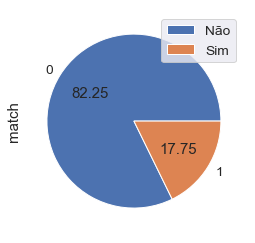

In [142]:
# Contando o número de match e não match do nosso DataSet
match = data.match.value_counts()

# Plotando um gráfico de pizza com a porcentagem de tais dados
match.plot(kind='pie', autopct="%.2f",legend=True)
plt.legend(["Não", "Sim"])

Dessa forma, a partir do gráfico acima, nota-se que a chance de não dar Match é bem maior. Nota-se também, a partir do próximo gráfico, que a porcentagem de mulheres que participaram do experimento é quase igual a de homens.

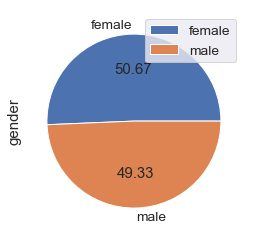

In [143]:
# Contando o número de Homem e mulheres que participaram do teste
genero=data.gender.value_counts()

# Plotando um gráfico de pizza com a porcentagem de tais dados
genero.plot(kind='pie', autopct="%.2f",legend=True)

Para ter uma maior noção do nosso público, como já sabemos que está bem dividido em relação a gênero, vamos analisar a idade:

count    1048.000000
mean       25.005725
std         3.270365
min        18.000000
25%        22.000000
50%        25.000000
75%        27.000000
max        35.000000
Name: age, dtype: float64

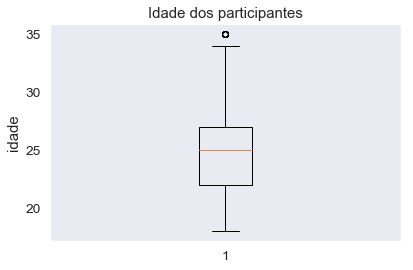

In [144]:
# Separando os dados referente a idade em um novo dataset
idade = data.age.astype(int) #Convertendo valores no formato texto para o formato numérico

# Plotando um boxplot
plt.boxplot(idade)
plt.title('Idade dos participantes')
plt.ylabel('idade')
plt.grid(which='both')
plt.tight_layout()

idade.describe()

Pelo gráfico acima, nota-se que a mediana e a média das idades esta nos 25 anos. Existem outliers concentrados nos 35 anos. 

Plotando um gráfico de porcentagem de Match por gênero, coincidentemente, foi possivel observar que tanto para homem quanto para mulher, a porcentagem de não match e match foram iguais a 41%, mostrando a grande quantidade de não matches.

match,0,1
gender,,
female,41.0,10.0
male,41.0,8.0


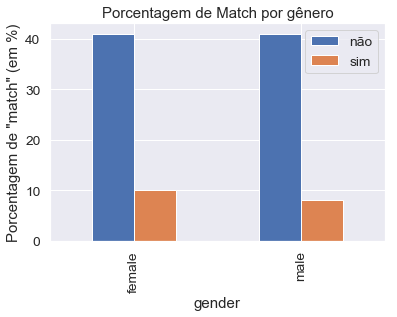

In [145]:
#Criando uma tabela entre Match e Gênero
match = pd.crosstab(data.gender, data.match)
match = (match/match.sum().sum()*100).round(decimals=0)

#Plotando um gráfico de barras com os dados obtidos
match.plot(kind= "bar")
plt.ylabel('Porcentagem de "match" (em %)')
plt.legend(["não", "sim"])
plt.title("Porcentagem de Match por gênero")
match

Analisando agora um gráfico de raça por importância da religião para a pessoa, nota-se que o grupo etnico racial africano localizado na américa se importa menos com a religião.

<BarContainer object of 1048 artists>

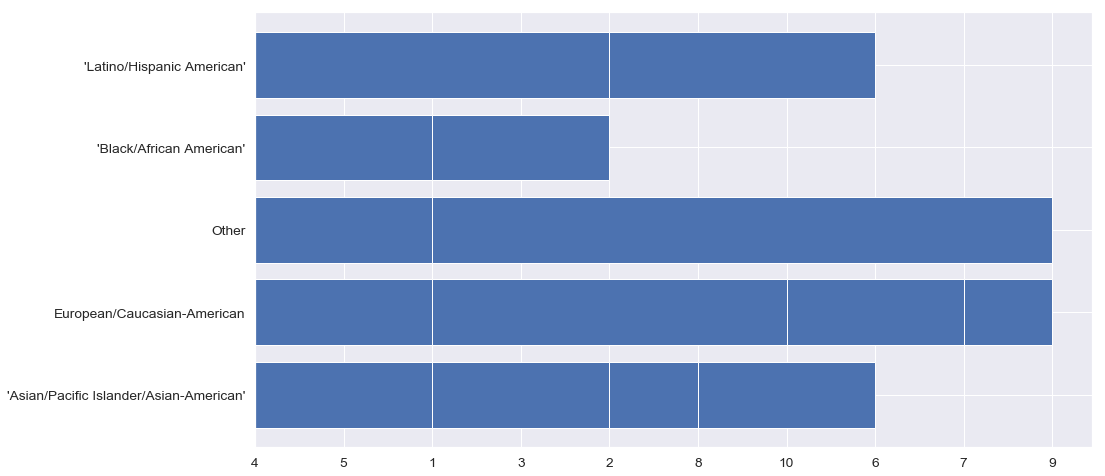

In [146]:
# Plotando um gráfico de barras com os dados obtidos
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh( data['race'], data['importance_same_religion'])

##### Os próximos gráficos plotados vão ser do tipo “O que a pessoa espera do outro” VS “O que o parceiro espera da pessoa”.

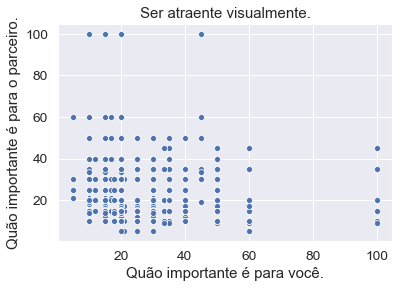

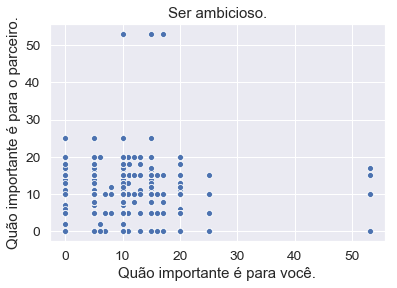

In [147]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_attractive = data.pref_o_attractive.astype(float)
you_attractive = data.attractive_important.astype(float)

# plotando um gráfico no formato Scatterplot com os dados referentes a atratividade
sns.scatterplot(you_attractive,partnere_attractive)
plt.title('Ser atraente visualmente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_ambitious = data.pref_o_ambitious.astype(float)
you_ambitious = data.ambtition_important.astype(float)

#Plotando um gráfico no formato Scatterplot com os dados referentes a ambição
sns.scatterplot(you_ambitious,partnere_ambitious)
plt.title('Ser ambicioso.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

Os gráficos acima mostram que, como a maioria dos pontos se acumula no canto inferior esquerdo do gráfico, vai ser mais difícil de obter um match se tanto a pessoa quanto o parceiro acharem que ser atraente visualmente ou que ser ambicioso é importante. Nota-se também que a maioria das pessoas que participaram da coleta de dados atribuiram entre 15 e 25 pontos a importância de ser atraente visualmente, por outro lado, existem pessoas que atribuiram 100 pontos a essa qualidade que se encontram nas periferias do gráfico. Para a caracteristica de ser ambicioso acontece a mesma coisa, mas com valores diferentes. Há alguns casais em que para um é muito importante ser atraente ou ser ambicioso mas para outro não é. 

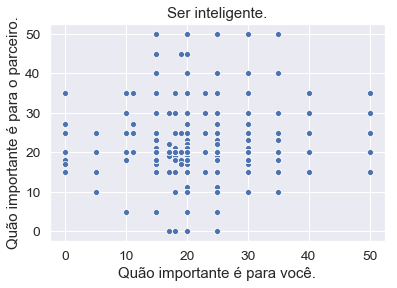

In [148]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_intelligence = data.pref_o_intelligence.astype(float)
you_intelligence = data.intellicence_important.astype(float)

# Plotando um gráfico no formato Scatterplot como os dados referentes a inteligências
sns.scatterplot(you_intelligence,partnere_intelligence)
plt.title('Ser inteligente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

O mesmo processo foi feito nesse gráfico só que agora para a qualidade "inteligência". Pode-se observar um resultado mais heterogêneo, onde os resultados se acumulam entre 15 e 20 pontos, que indica os valores mais apropriados para se obter um match. Diferente do outro, nesta situação pode ser relativamente mais comum se obter um match fora da área de acumulo dos pontos pois obtivemos diversos pontos espalhados pelo gráfico.

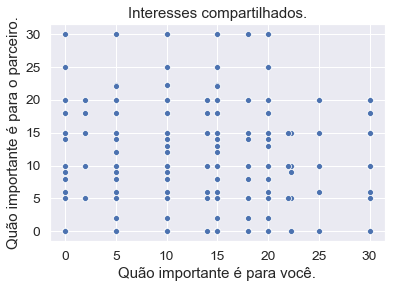

In [149]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_interes = data.pref_o_shared_interests.astype(float)
you_interes = data.shared_interests_important.astype(float)

# Plotando um gráfico no formato Scatterplot com os dados refentes aos interesses
sns.scatterplot(you_interes,partnere_interes)
plt.title('Interesses compartilhados.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

Já nesssa situação, agora para qualidade "interesses compartilhados", podemos observar uma completa descentralização dos pontos no total, o que indica que não temos uma área de pontos centralizdos, ou seja, não há área de "fácil match", todas as seções do gráfico vão ter uma chance de dar match parecidas (com exceção do canto superior direito).

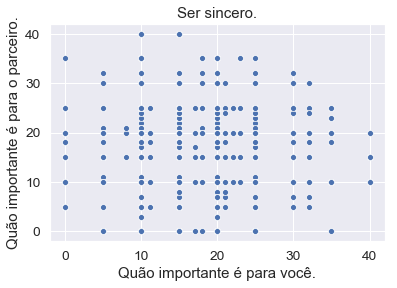

In [150]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_sincere = data.pref_o_sincere.astype(float)
you_sincere = data.sincere_important.astype(float)

# Plotando um gráfico no formato Scatterplot para os dados referentes a siceridade
sns.scatterplot(you_sincere,partnere_sincere)
plt.title('Ser sincero.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

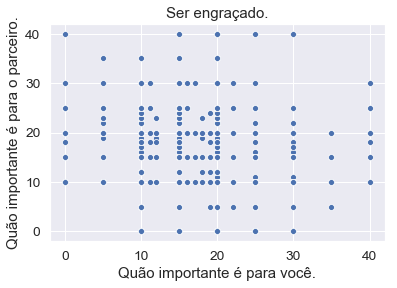

In [151]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
partnere_funny = data.pref_o_funny.astype(float)
you_funny = data.funny_important.astype(float)

# Plotando um gráfico no formato Scatterplot com os dado refente a ser engraçado
sns.scatterplot(you_funny,partnere_funny)
plt.title('Ser engraçado.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

Nos gráficos acima, de ser engraçado e de ser sincero, há uma distribuição uniforme no centro, na faixa de 10 a 25, mostrando que é mais difícil dar match quando os dois do casal acham que é ou muito importante ou pouquissimo importante ser engraçado ou ser sincero.

---
### Análise de Match por interesse.
---
> ##### Interesse por Shopping

In [152]:
# Criando uma tabela com os dados referentes a shopping
shopping=pd.crosstab(data.shopping, data.match)
shopping

match,0,1
shopping,,
1,32,4
10,80,23
2,117,32
3,57,13
4,102,14
5,165,30
6,104,25
7,68,7
8,82,29


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


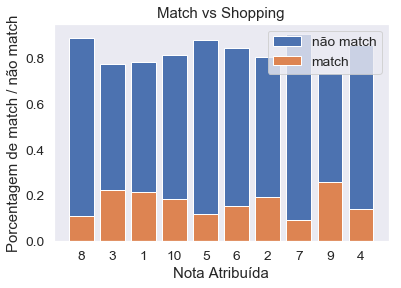

In [153]:
# Criando uma lista com o total de matches e não matches para cada nota de shopping
total=[36, 103, 149, 70, 116, 195, 129, 75, 111,64]

# Criando listas para armazenar os valores de match e não match
valor_nao_match=[]
valor_match=[]
a=0
for i in shopping[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in shopping[1]:
    valor_match.append(i/total[b]) 
    b+=1

shopping=data.loc[data.match==1]
shopping.shopping
v=[]
shopping.shopping
for i in shopping.shopping: 
    if i not in v:
        v.append(i)


shopping2=data.loc[data.match==0]
shopping2.shopping
v2=[]
for i in shopping2.shopping: 
    if i not in v2:
        v2.append(i)

# plotando gráfico de barras ferente aos dados obtidos
plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match / não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Shopping")
plt.grid()

> ##### Interesse por Exercícios

In [154]:
# Criando uma tabela com os dados referentes a Exercícios
exercise=pd.crosstab(data.exercise, data.match)
exercise

match,0,1
exercise,,
1,8,15
10,59,2
2,90,13
3,87,13
4,66,16
5,77,22
6,117,17
7,144,31
8,128,37


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


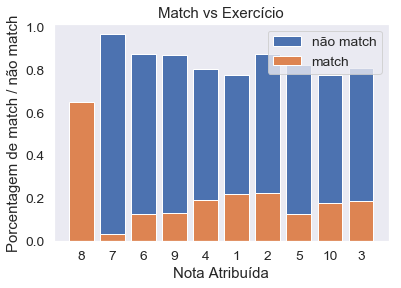

In [155]:
# Criando uma lista com o total de matches e não matches para cada nota de Exercise
total=[23, 61, 103, 100, 82, 99, 134, 175, 165, 106]

# Criando listas para armazenar os valores de match e não match
valor_nao_match=[]
valor_match=[]
a=0
for i in exercise[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in exercise[1]:
    valor_match.append(i/total[b]) 
    b+=1

exercicio=data.loc[data.match==1]
exercicio.exercise
v=[]
for i in exercicio.exercise: 
    if i not in v:
        v.append(i)


exercicio2=data.loc[data.match==0]
exercicio2.exercise
v2=[]
for i in exercicio2.exercise: 
    if i not in v2:
        v2.append(i)

# plotando gráfico de barras ferente aos dados obtidos
plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match / não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Exercício")
plt.grid()

> ##### Interesse por Arte

In [156]:
# Criando uma tabela com os dados referentes a art
arte=pd.crosstab(data.art, data.match)
arte

match,0,1
art,,
1,5,3
10,68,34
2,21,2
3,74,12
4,116,16
5,82,8
6,131,26
7,136,42
8,169,31


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


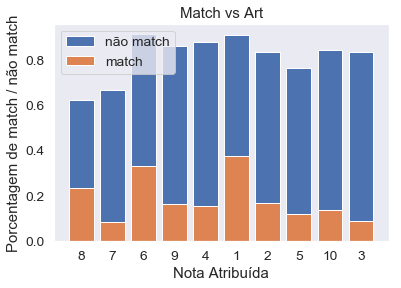

In [157]:
# Criando uma lista com o total de matches e não matches para cada nota de Art
total=[8, 102, 23,86, 132, 90, 157, 178, 200, 72]

# Criando listas para armazenar os valores de match e não match
valor_nao_match=[]
valor_match=[]
a=0
for i in arte[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in arte[1]:
    valor_match.append(i/total[b]) 
    b+=1

arte=data.loc[data.match==1]
arte.art
v=[]
for i in arte.art: 
    if i not in v:
        v.append(i)


arte2=data.loc[data.match==0]
arte2.art
v2=[]
for i in arte2.exercise: 
    if i not in v2:
        v2.append(i)

# plotando gráfico de barras ferente aos dados obtidos
plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match / não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Art")
plt.grid()
plt.show()

> ##### Interesse por Filmes

In [158]:
# Criando uma tabela com os dados referentes a filmes
filmes=pd.crosstab(data.movies, data.match)
filmes

match,0,1
movies,,
10,183,61
3,12,4
4,14,1
5,17,6
6,87,14
7,180,30
8,203,38
9,166,32


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


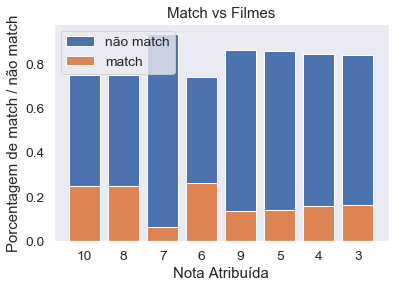

In [159]:
# Criando uma lista com o total de matches e não matches para cada nota de movies
total=[244, 16, 15, 23, 101, 210, 241, 198]

# Criando listas para armazenar os valores de match e não match
valor_nao_match=[]
valor_match=[]
a=0
for i in filmes[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in filmes[1]:
    valor_match.append(i/total[b]) 
    b+=1

filmes=data.loc[data.match==1]
filmes.movies
v=[]
for i in filmes.movies: 
    if i not in v:
        v.append(i)


filmes2=data.loc[data.match==0]
filmes2.movies
v2=[]
for i in filmes2.movies: 
    if i not in v2:
        v2.append(i)

# plotando gráfico de barras ferente aos dados obtidos
plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.ylabel("Porcentagem de match / não match")
plt.xlabel("Nota Atribuída")
plt.legend(["não match", "match"])
plt.title("Match vs Filmes")
plt.grid()

> ##### Interesse por Festas

In [160]:
# Criando uma tabela com os dados referentes a clubbing
clubbing=pd.crosstab(data.clubbing, data.match)
clubbing

match,0,1
clubbing,,
1,18,1
10,27,19
2,25,7
3,89,13
4,105,8
5,107,24
6,122,30
7,179,41
8,96,16


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


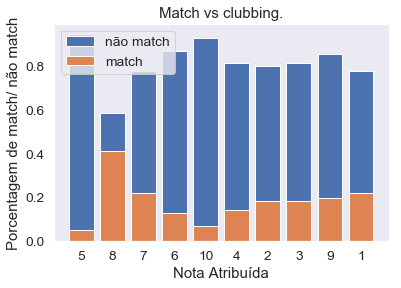

In [161]:
# Criando uma lista com o total de matches e não matches para cada nota de Clubbing
total=[19, 46, 32, 102, 113, 131, 152, 220, 112,121]

# Criando listas para armazenar os valores de match e não match
valor_nao_match=[]
valor_match=[]
a=0
for i in clubbing[0]:
    valor_nao_match.append(i/total[a]) 
    a+=1
valor_nao_match

b=0
for i in clubbing[1]:
    valor_match.append(i/total[b]) 
    b+=1

clubbing=data.loc[data.match==1]
clubbing.clubbing
v=[]
for i in clubbing.clubbing: 
    if i not in v:
        v.append(i)


clubbing2=data.loc[data.match==0]
clubbing2.clubbing
v2=[]
for i in clubbing2.clubbing: 
    if i not in v2:
        v2.append(i)

plt.bar(v2, valor_nao_match)
plt.subplot(111,)
plt.bar(v, valor_match)
plt.title('Match vs clubbing.')
plt.ylabel("Porcentagem de match/ não match")
plt.xlabel("Nota Atribuída")
plt.grid()
plt.legend(["não match", "match"])

Os gráficos plotados são porcentagens relativas a cada nota atribuída pela categoria, pois se fosse utilizada a porcentagem total, as notas que foram mais atribuídas seriam as mais propensas a fornecer a maior porcentagem de match e não match. Desse modo, é  possível perceber que aqueles que apresentam um maior interesse por festejar, fazer compras e exercícios, também possui uma maior porcentagem de Match. Porém, aqueles que demonstram um interesse médio para alto em filmes, são aqueles que vão conseguir o maior número de match, e, por sua vez, aqueles que apresentam um baixo interesse em arte são os que também recebem mais match.

---
#### Outro modo de visualização dos dados:
---

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()


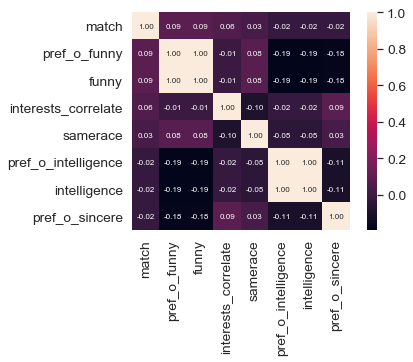

In [162]:
#Convertendo valores no formato texto para o formato numérico e separando em um novo DataSet
data.age = data.age.astype(int)
data.age_o = data.age_o.astype(int)
data.match  = data.match.astype(int)
data.exercise = data.exercise.astype(int)
data.interests_correlate = data.interests_correlate.astype(float)
data.pref_o_attractive = data.pref_o_attractive.astype(float)
data.pref_o_sincere = data.pref_o_sincere.astype(float)
data.pref_o_intelligence = data.pref_o_intelligence.astype(float)
data.pref_o_funny = data.pref_o_funny.astype(float)
data.pref_o_ambitious = data.pref_o_ambitious.astype(float)
data.attractive = data.pref_o_attractive.astype(float)
data.sincere = data.pref_o_sincere.astype(float)
data.intelligence = data.pref_o_intelligence.astype(float)
data.funny = data.pref_o_funny.astype(float)
data.ambitious = data.pref_o_ambitious.astype(float)

# plotando um gráfico no formato Heatmap com os dados obtidos
cols = data.corr().nlargest(8, 'match')['match'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()




Após plotar o gráfico acima, concluimos que apesar de conseguirmos fazer associações entre as colunas nos gráficos anteriores, nota-se que nenhuma das classificações tem um peso substancial na hora de influenciar o match. 

---
#### Observando a probabilidade de dar match dado as faixas de diferenças entre a resposta do casal:
---

A partir das variáveis relacionadas à diferença numérica, separada em faixas, entre as respostas de cada parte do casal, foi possível calcular, para cada característica, a probabilidade condicional de dar Match, ou não, dadas as faixas das variáveis. Dessa forma, foram obtidos alguns resultados significantes para a interpretação do nosso dataset. Entre eles: 


* Como esperado, se as pessoas já se conheciam antes, elas tem mais chance de dar match. 
<br > 
<br>
* Quanto maior a diferença entre a nota atribuída para jogos eletrônicos por cada casal, maior a chance de dar match; 
<br > 
<br>
* Se uma das pessoas não gosta de sair, ir às festas, e a outra sim, a chance de elas darem match é maior do que se ambas tiverem o mesmo gosto.
<br > 
<br>
* Se ambas as pessoas ligarem muito para a religião, ou ambas não ligarem nem um pouco, elas também terão uma maior chance para match.
<br > 
<br>
* Aqueles candidatos que possuem a mesma raça, possuem uma ligeira vantagem em relação a probabilidade de dar match.
<br > 
<br>
* A diferença de idade em que mais pessoas deram match, foi a de 8 anos.
<br > 
<br>
* Em relação ao quão atraente o seu parceiro te avaliou, e vice-versa, os resultados em relação a probabilidadde de dar match são contrários, ou seja, quanto menor a diferença entre as notas, menor a chance de vocês darem match.
<br > 
<br>
* Isso vale também para as notas que as pessoas atribuíram na rodada sobre o quanto elas têm interesses em comum com seu parceiro. Quanto maior a faixa de diferença, ou seja, se um deles achou que têm muitos interesses em comum, e o outro não, maior a chance de dar match.

In [163]:
for v in ['d_pref_o_funny' ,'d_pref_o_ambitious',
        'd_pref_o_shared_interests','d_pref_o_sincere', 'd_pref_o_intelligence',
        'd_pref_o_attractive',"d_age",'d_importance_same_race',
        'd_importance_same_religion', 'd_attractive_o',
        'd_sinsere_o' ,'d_intelligence_o' ,'d_funny_o', 'd_ambitous_o',
        'd_shared_interests_o', 'd_attractive_important' ,'d_sincere_important' ,'d_intellicence_important',
        'd_funny_important', 'd_ambtition_important',
        'd_shared_interests_important', 'd_attractive', 'd_sincere',
        'd_intelligence', 'd_funny' ,'d_ambition', 'd_attractive_partner' ,'d_sincere_partner',
        'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner',
        'd_shared_interests_partner', 'd_sports', 'd_tvsports',
        'd_exercise' ,'d_dining' ,'d_museums', 'd_art' ,'d_hiking', 'd_gaming',
        'd_clubbing' ,'d_reading', 'd_tv' ,'d_theater' ,'d_movies' ,'d_concerts',
        'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate',
        'd_like', 'met','samerace']:
    x = pd.crosstab(data.match, data[v])
    print('='*50)
    print((x.loc[1,:] / x.sum()).sort_index())

d_pref_o_funny
[0-15]      0.160164
[16-20]     0.164345
[21-100]    0.242574
dtype: float64
d_pref_o_ambitious
[0-15]      0.178733
[16-20]     0.181208
[21-100]    0.066667
dtype: float64
d_pref_o_shared_interests
[0-15]      0.170872
[16-20]     0.198675
[21-100]    0.280000
dtype: float64
d_pref_o_sincere
[0-15]      0.209544
[16-20]     0.126685
[21-100]    0.194872
dtype: float64
d_pref_o_intelligence
[0-15]      0.182540
[16-20]     0.165385
[21-100]    0.191542
dtype: float64
d_pref_o_attractive
[0-15]      0.202658
[16-20]     0.176471
[21-100]    0.160377
dtype: float64
d_age
0     0.263636
1     0.175214
2     0.160622
3     0.216783
4     0.186916
5     0.089888
6     0.153846
7     0.160714
8     0.357143
9     0.047619
10    0.000000
11    0.000000
13    0.000000
14    1.000000
dtype: float64
d_importance_same_race
[0-1]     0.245562
[2-5]     0.170029
[6-10]    0.121212
dtype: float64
d_importance_same_religion
[0-1]     0.252252
[2-5]     0.146409
[6-10]    0.138810
dty

---
## Classificador 
---
Abaixo, encontra-se uma função responsável por trasformar uma variável categórica em uma variável numérica, por meio da função HotEncoder, do Python, agrupando tais dados em uma nova tabela:

In [164]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [165]:
# Definindo variáveis categóricas, e numéricas
# Variáveis numéricas:
X_num = data[['age', "age_o", 'importance_same_race',
 'importance_same_religion',  'pref_o_attractive', 'pref_o_sincere',
 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
 'pref_o_shared_interests',  'attractive_o' ,'sinsere_o' ,'intelligence_o',
 'funny_o' ,'ambitous_o', 'shared_interests_o' ,'attractive_important', 'sincere_important',
 'intellicence_important' ,'funny_important',
 'ambtition_important' ,'shared_interests_important' ,'attractive', 'sincere',
 'intelligence' ,'funny' ,'ambition' ,'attractive_partner', 'sincere_partner',
 'intelligence_partner', 'funny_partner' ,'ambition_partner',
 'shared_interests_partner', 'sports', 'tvsports' ,'exercise', 'dining',
 'museums', 'art' ,'hiking' ,'gaming' ,'clubbing', 'reading', 'tv' ,'theater',
 'movies' ,'concerts', 'music' ,'shopping' ,'yoga', 
 'like']]

# Variáveis categóricas:
X_cat = data[['gender', 'race', "race_o", 'field', 'met']]
diferenças = ['d_pref_o_funny' ,'d_pref_o_ambitious','d_pref_o_shared_interests',
'd_pref_o_sincere', 'd_pref_o_intelligence',
'd_pref_o_attractive',"d_age",'d_importance_same_race',
'd_importance_same_religion', 'd_attractive_o',
'd_sinsere_o' ,'d_intelligence_o' ,'d_funny_o', 'd_ambitous_o',
'd_shared_interests_o', 'd_attractive_important' ,'d_sincere_important' ,'d_intellicence_important',
'd_funny_important', 'd_ambtition_important',
'd_shared_interests_important', 'd_attractive', 'd_sincere',
'd_intelligence', 'd_funny' ,'d_ambition', 'd_attractive_partner' ,'d_sincere_partner',
'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner',
'd_shared_interests_partner', 'd_sports', 'd_tvsports',
'd_exercise' ,'d_dining' ,'d_museums', 'd_art' ,'d_hiking', 'd_gaming',
'd_clubbing' ,'d_reading', 'd_tv' ,'d_theater' ,'d_movies' ,'d_concerts',
'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate' ,
'd_like']

In [166]:
# Definindo um novo DataSet no qual será utilizado a função
novo = data

# Aplicando a função para os X categóricos
for i in X_cat:
    novo = dummify(novo, i)

In [167]:
# Aplicando a função para os valores de diferenças
for i in diferenças:
    novo = dummify(novo, i)

In [168]:
novo.head()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,d_shopping_[9-10],d_yoga_[0-5],d_yoga_[6-8],d_yoga_[9-10],d_interests_correlate_[-1-0],d_interests_correlate_[0-0.33],d_interests_correlate_[0.33-1],d_like_[0-5],d_like_[6-8],d_like_[9-10]
0,21,27,0,2,4,35.0,20.0,20.0,20.0,0.0,...,0,1,0,0,0,1,0,0,1,0
1,21,22,0,2,4,60.0,0.0,0.0,40.0,0.0,...,0,1,0,0,0,0,1,0,1,0
3,21,23,0,2,4,30.0,5.0,15.0,40.0,5.0,...,0,1,0,0,0,0,1,0,1,0
4,21,24,0,2,4,30.0,10.0,20.0,10.0,10.0,...,0,1,0,0,0,1,0,0,1,0
5,21,25,0,2,4,50.0,0.0,30.0,10.0,0.0,...,0,1,0,0,0,1,0,0,1,0


In [169]:
X = novo.drop('match', axis=1)
y = novo['match']

In [170]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)


---
### Random Forest
---
Para classificar nosso modelo, fizemos o método de Random Forest, no qual opera a partir da criação de um conjunto de árvores de decisões, sendo que cada árvore representa uma amostra dos nossos dados de treinamento. Sendo assim, apartir disso, tal tecnica desenvolve subconjuntos aleatórios, no qual o atributo com maior relevância é escolhido. Por fim, o modelo é baseado no voto da maioria das árvores individuais.

In [171]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8285714285714286


In [172]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test.tolist(),y_pred,labels=[0,1])
new_df = pd.DataFrame(confusion,
                 index = novo['match'].unique(),
                 columns = novo['match'].unique())
new_df

,0,1
0,171,1
1,35,3


---
#### Lista de relevância 

In [173]:
sorted(list(zip(model.feature_importances_, X.columns)), reverse=True)

[(0.033736696321132284, 'like'),
 (0.028495894681800384, 'shared_interests_o'),
 (0.028434172611572803, 'attractive_partner'),
 (0.028221610466918613, 'attractive_o'),
 (0.02125531245542728, 'funny_o'),
 (0.020931902036739163, 'shared_interests_partner'),
 (0.02081461212254142, 'funny_partner'),
 (0.018471925690064044, 'interests_correlate'),
 (0.013162304578475222, 'age_o'),
 (0.012819428443420405, 'd_shared_interests_o_[0-5]'),
 (0.011748638150712212, 'pref_o_shared_interests'),
 (0.011670084316955157, 'd_attractive_o_[0-5]'),
 (0.011101625728760792, 'ambitous_o'),
 (0.010845191111654657, 'intelligence_o'),
 (0.010557837596501331, 'd_shared_interests_o_[9-10]'),
 (0.010470987066634017, 'sinsere_o'),
 (0.01041491603093807, 'exercise'),
 (0.010316299938777893, 'sincere'),
 (0.010035677373943086, 'd_like_[9-10]'),
 (0.009925314514789913, 'attractive'),
 (0.009649460801739089, 'pref_o_funny'),
 (0.009523623260812583, 'ambition_partner'),
 (0.009401650964776437, 'sincere_partner'),
 (0.00

---
### Regressão Logística
---
Outro método de classificação utilizado para comprovação dos dados analizados e da acurácia obtida foi a Regressão logística, no qual pode ser utilizado por estarmos avaliando variáveis categóricas binarias. Sendo assim tal método de classificação opera com enfoque na questão matemática da estatística por meio de uma comparação entre os padrões das variáveis encontradas no DataSet

In [174]:
# Regressão Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8285714285714286


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---
### Máquina de vetores de suporte
---
Por fim, mais uma vez com o objetivo de verificar a acurácia obtida a partir dos outros dois modelos acima, decidimos utilizar o Support Vector Machine, como forma de comparar dais dados para uma melhor concluisão do modelo. Tal método, por sua vez, opera a partir

In [175]:
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.819047619047619


---
---
#### Relembrando alguns dados

In [176]:
y.value_counts(True)

0    0.822519
1    0.177481
Name: match, dtype: float64

---
## Conclusão:
---
<p>Antes de começar a desenvolver a conclusão, vale ressaltar que como analisado pelo primeiro gráfico, a probabilidade de não dar match é de 82.25%. Isso quer dizer que se a pessoa chutar que o casal não deu match, essa é a probabilidade dela acertar e, portanto, qualquer classificador, só será eficaz se der uma acurácia maior que 82.25%.  
<p>Iniciando a conclusão pela análise dos nossos dados, nota-se que apesar de conseguirmos fazer associações entre as classificações, nenhuma das colunas tem um peso substancial na hora de dar match, e isso é provado pelo último gráfico, onde a classificação com maior correlação com "match" é a "funny" ("Quão engraçado você é?"), com 0.09 de relação.
<p>Após a exploração dos dados, começamos a utilizar um tipo de classificação chamada RandomForest, responsável por, através de ramificações, classificar o conjunto de dados pegando como análise diversos cenários. Primeiramente, achamos que as variáveis responsáveis por calcular as diferenças (ex:'d_age') não iam influenciar na hora do classificador, e sem elas, aumentaria a acurácia, pois essas variáveis são diferenças entre dois outros dados, os quais já estavam sendo utilizados. Ao rodar o programa, obtivemos a acurácia de aproximadamente 85%. Uma acurácia dessas é ruim se levada em conta que já temos 82.25% de chance de acertar, como explicado no primeiro parágrafo. 
<p>Dessa forma, para melhorar nossa acurácia, levamos em conta a categoria de diferenças, que fez a acurácia subir para 95%, um número bom dado o contexto em que está inserido. Porém, até esse momento, estávamos levando em conta a própria categoria "Match" dentro do RandomForest, o que explica o motivo de nossa acurácia ter um valor tão alto. Após percebermos o erro, retiramos a categoria "Match" do Classificador e obtivemos, por fim, uma acurácia de 82.25%.
<p>Essa última acurácia, de 82.25%, prova a ineficiência do nosso Classificador dado nosso objetivo, que era prever se um casal daria Match ou não a partir de um questionário. A ineficiência é provada também através da lista de relevância, onde os pesos das categorias no RandomForest são muito baixos, sendo "like" a com maior relevância, de aproximadamente 3.3%. 
<p>Sendo assim, a partir dessa análise, conseguimos reforçar que as categorias utilizadas não interferem na hora de dar match ou não, comprovando que esse tipo de questionário, utilizado por diversos websites, nâo é o suficiente para prever se duas pessoas vão ficar juntas ou nâo.


##### Referencias:
* inspiração de graficos em alguns notebooks no Kaggle, como o "The Secret to Getting the Second Date"
* para o classificador, retiramos modelos de codigos dados em aulas 